In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from code import code
%matplotlib inline

df = pd.read_csv("C:\\Users\\Hamid\\Desktop\\svm\\Codes\\21-11-18\\TrainFeatures.csv")
df.head()


,Unnamed: 0,tempo,average_beats,chroma_stft_mean,chroma_cq_mean,chroma_cens_mean,melspectrogram_mean,mfcc_mean,mfcc_delta_mean,rmse_value,energy_value,pow_value
0,1,215.332031,73.0,0.483418,0.551106,0.275794,1.820109,-19.420459,0.077504,0.059540,-41.735454,-30.599430
1,2,258.398438,67.0,0.445499,0.578630,0.279166,1.297865,-14.541145,0.268970,0.052430,-37.889742,-26.584167
2,3,151.999081,49.5,0.376109,0.561409,0.283134,4.274416,-13.687681,-0.038535,0.121896,-29.205927,-18.130950
3,4,99.384014,35.0,0.401752,0.547179,0.278545,2.801192,-16.490017,-0.045572,0.092446,-35.949236,-24.867398
4,5,287.109375,32.0,0.436714,0.517175,0.267707,6.257126,-11.969786,0.087686,0.105562,-39.498957,-28.088612


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
Index                  239 non-null int64
tempo                  239 non-null float64
average_beats          239 non-null float64
chroma_stft_mean       239 non-null float64
chroma_cq_mean         239 non-null float64
chroma_cens_mean       239 non-null float64
melspectrogram_mean    239 non-null float64
mfcc_mean              239 non-null float64
mfcc_delta_mean        239 non-null float64
rmse_value             239 non-null float64
energy_value           239 non-null float64
pow_value              239 non-null float64
Label                  239 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 24.4+ KB


In [3]:
#how many categories we have?
df['Label'].unique()

array(['Angry', 'Happy', 'Sad'], dtype=object)

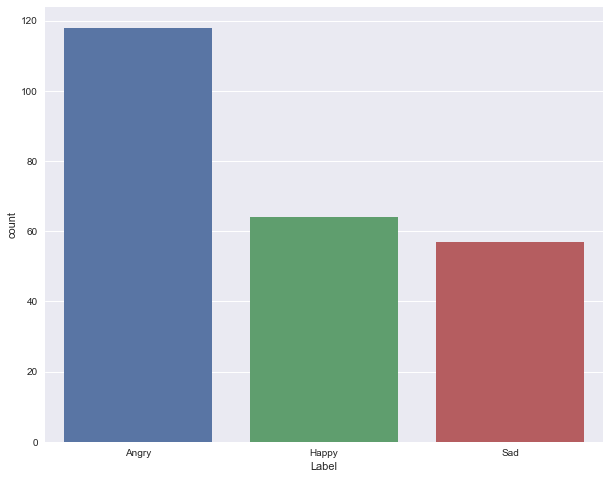

In [4]:
plt.figure(figsize = (10, 8))
sns.countplot(df['Label'])
plt.show()

In [5]:
df['Label'].value_counts()


Angry    118
Happy     64
Sad       57
Name: Label, dtype: int64

In [6]:
df.isnull().sum().sum() #Check to see if there are missing values


0

In [2]:
from sklearn import svm
from sklearn import preprocessing as pre
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


def code(testX):

    trainFileName="features.csv"
    trainData = np.genfromtxt( fname =trainFileName, delimiter= ',') # read training data from file
    trainX=trainData[1:,2:12] # create tranining data matix
    #trainX=trainData[1:,2:39] # create tranining data matix

    trainLabel = np.genfromtxt( fname ="TrainingLabels.csv", delimiter= ',', dtype='U11') # read training data from file
    trainY=trainLabel[1:] # create labels array
    print(trainY.size)
    #C=60,gamma= 1.4176e-007
    C=1.0 
    gamma = 0.1
    clf = svm.SVC(C=C, gamma=gamma, kernel = 'linear')
    #clf=tree.DecisionTreeClassifier()
    #clf = KNeighborsClassifier(n_neighbors=3)
    #clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)

    clf.fit(trainX, trainY)




    testData = np.genfromtxt( fname =testX, delimiter= ',') # read testing data from file
    testX=testData[1:,2:12] # create testing data matix

    testLabels=np.genfromtxt( fname= "TestingLabels.csv", delimiter = ',', dtype ='U11') # read testing data from file
    code.testY=testLabels[1:] # create labels array
    print("\t\t====== Actual Testing Set Labels =======\n")
    print("------------------------------------------------------------------------------------------------------")
    print(code.testY)
    print("------------------------------------------------------------------------------------------------------")
    
    code.testPredy=clf.predict(testX)
    print("\t\t\t====== Predicted Labels =======\n")
    print("------------------------------------------------------------------------------------------------------")
    print(code.testPredy)
    print("------------------------------------------------------------------------------------------------------")
    
    
    #return testPredy


    prediction = pd.DataFrame(code.testPredy,columns=['Label'])
    prediction.to_csv('prediction.csv',index_label='ID')
    
    accuracy = accuracy_score(code.testY, code.testPredy)
    print("\n------------------------------------------------------------------------------------------------------")
    print("SVM accuracy = {}% ".format(accuracy * 100))
    
    classificationError = 1 - accuracy
    print("\n------------------------------------------------------------------------------------------------------")
    print("SVM Classification Error = {}% ".format(classificationError * 100))

   # return code.testY, code.testPredy

code("TestingFeatures.csv")

201
		====== Actual Testing Set Labels =======

------------------------------------------------------------------------------------------------------
['Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Anger' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy'
 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Sad'
 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad' 'Sad'
 'Sad' 'Sad']
------------------------------------------------------------------------------------------------------
			====== Predicted Labels =======

------------------------------------------------------------------------------------------------------
['Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Happy'
 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger' 'Anger'
 'Anger' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy' 'Happy'
 'Happy' 'H

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(code.testY,code.testPredy))

             precision    recall  f1-score   support

      Angry       1.00      0.67      0.80         6
      Happy       0.60      1.00      0.75         3
        Sad       1.00      1.00      1.00         3

avg / total       0.90      0.83      0.84        12



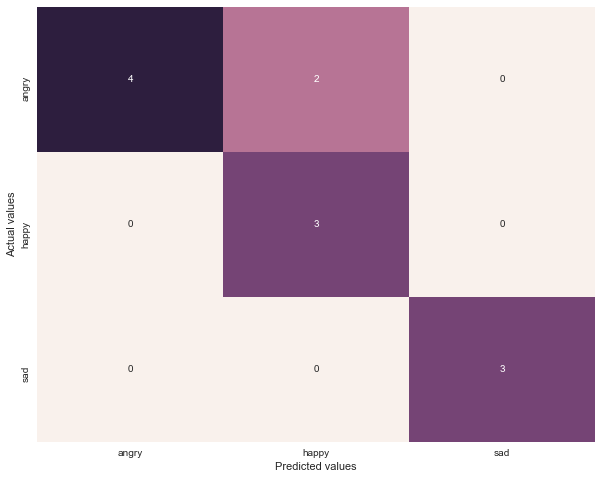

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


labels = ['angry', 'happy', 'sad']
cm1 = pd.DataFrame(confusion_matrix(code.testY, code.testPredy), index = labels, columns = labels)
plt.figure(figsize = (10, 8))
sns.heatmap(cm1, annot = True, cbar = False, fmt = 'g')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

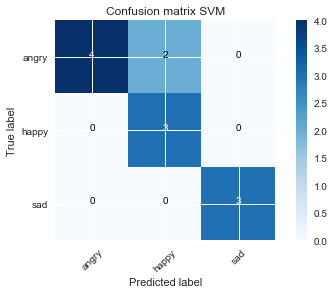

In [10]:
from sklearn.linear_model import LogisticRegression


In [7]:
from sklearn import svm
from sklearn import preprocessing as pre
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
    
trainFileName="C:\\Users\\Hamid\\Desktop\\svm\\Codes\\21-11-18\\TrainFeatures.csv"
#trainData = np.genfromtxt( fname =trainFileName, delimiter= ',') # read training data from file
#trainX=trainData[1:,2:12] # create tranining data matix
#trainX=trainData[1:,2:39] # create tranining data matix
#print(trainX)
#trainLabel = np.genfromtxt( fname =trainFileName, delimiter= ',', dtype='U11') # read training data from file
#trainY=trainLabel[] # create labels array

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

[[ 7.30000000e+01  4.83417558e-01  5.51105952e-01 ...  5.95398680e-02
  -4.17354545e+01 -3.05994301e+01]
 [ 6.70000000e+01  4.45499224e-01  5.78629793e-01 ...  5.24298880e-02
  -3.78897420e+01 -2.65841672e+01]
 [ 4.95000000e+01  3.76109495e-01  5.61409097e-01 ...  1.21895568e-01
  -2.92059266e+01 -1.81309501e+01]
 ...
 [ 8.00000000e+00  4.00474632e-01  5.01020690e-01 ...  8.23026840e-02
  -3.70399206e+01 -2.58763578e+01]
 [ 2.25000000e+01  4.58640621e-01  5.82693104e-01 ...  4.75488470e-02
  -4.37228867e+01 -3.27054031e+01]
 [ 8.00000000e+00  4.08380610e-01  4.65682899e-01 ...  4.20506360e-02
  -4.27667643e+01 -3.15917500e+01]]


In [ ]:
X = df.drop(['Index', 'Label'], axis = 1) #features
y = df['Label'] #labels